# Lesson 06 Assignment

In this assignment, we want to read the `retail-churn.csv` dataset that we examined in a previous assignment and begin to pre-process it. The goal of the assignment is to become familiar with some common pre-processing and feature engineering steps by implementing them.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

col_names = ['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp', 'item_id', 'quantity', 'dollar']
churn = pd.read_csv("../data/retail-churn.csv", sep = ",", skiprows = 1, names = col_names)

### Some basic EDA
present the first few rows and use pandas' `describe` to get an overview of the data
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[0 point]</span>

In [27]:
# Add code here
churn.describe()

churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar
0,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37
1,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17
2,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23
3,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41
4,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288


The new data frame will be called `churn_processed`, which stores the pre-processed columns as you run through each of these steps. You will need to make sure your columns are properly named.

1. Cast the `timestamp` column in churn into a column of type `datetime` and put the column into the `churn_processed` dataframe.  The new column should also be named `timestamp`.  Extract two new columns from `timestamp`: `dow` is the day of the week and `month` is the month of the year. Then drop the `timestamp` column from `churn_processed`.  Present the first few rows of `churn_processed`.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[2 point]</span>

In [45]:
# Add code here
# Create the new (empty) data frame, called churn_processed
churn_processed = pd.DataFrame()

# Cast timestamp to datetime
churn_processed['timestamp'] = pd.to_datetime(churn['timestamp'])
# Create a dow column
churn_processed['dow'] = churn_processed['timestamp'].dt.dayofweek  # Monday = 0, Sunday = 6
# Create a month column
churn_processed['month'] = churn_processed['timestamp'].dt.month
# Drop Timestamp
churn_processed = churn_processed.drop(columns = ['timestamp'])
# See what we have
churn_processed.head()

,dow,month
0,2,11
1,2,11
2,2,11
3,2,11
4,2,11


2. Add `address` from `churn` to `churn_processed`. One-hot encode `address`, `dow` and `month`. Then drop columns `address`, `dow`, and `month` from `churn_processed`.  Finally, show some of the dataframe.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[2 point]</span>  

In [46]:
# Add code here
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# add address column
churn_processed['address'] = churn['address']

# One-hot-encode address, dow and month
churn_cat = churn_processed[['address', 'dow', 'month']].copy()

# Create Column Names
onehot.fit(churn_cat)
col_names = onehot.get_feature_names_out(churn_cat.columns)

# Add one-hot encoded values to new columns
churn_processed_onehot =  pd.DataFrame(onehot.transform(churn_cat), columns = col_names)
churn_processed = pd.concat([churn_processed, churn_processed_onehot], axis=1)

# Drop address, dow and month
churn_processed = churn_processed.drop(columns = ['address', 'dow', 'month'])

# Show the dataframe
churn_processed.head()

,address_A,address_B,address_C,address_D,address_E,address_F,address_G,address_H,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,month_1,month_2,month_11,month_12
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
churn_processed.columns

Index(['address_A', 'address_B', 'address_C', 'address_D', 'address_E',
       'address_F', 'address_G', 'address_H', 'dow_0', 'dow_1', 'dow_2',
       'dow_3', 'dow_4', 'dow_5', 'dow_6', 'month_1', 'month_2', 'month_11',
       'month_12'],
      dtype='object')

3. So far we dropped `address`, `dow`, `month`, and `timestamp`.  Why would we want to drop all these columns?
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[1 point]</span> 

**Why would we want to drop all these columns?**<br/>
Add Comment here  
The one hot encoded columns represented the same information of the categorical columns (address, dow, month and timestamp), so it is redundant to keep them. And the categorical columns are non-numeric, they do not work with ML libraries such as SK learn.

4. Rescale `dollar` using min-max normalization. Use `pandas` and `numpy` to do it and call the rescaled column `dollar_std_minmax`.  Then see what the first few rows of the dataframe looks like.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[1 point]</span> 

In [52]:
# Add code here
from sklearn.preprocessing import MinMaxScaler, StandardScaler

cols_minmax = ['dollar_std_minmax']

# create instance of class for minmax scaler
minmax_scaler = MinMaxScaler() 

minmax_scaler.fit(churn[['dollar']])  
churn_processed[cols_minmax] = minmax_scaler.transform(churn[['dollar']])

print(churn_processed[cols_minmax].head())

# See what the dataframe looks like
churn_processed.head()

   dollar_std_minmax
0           0.000510
1           0.000227
2           0.000312
3           0.000567
4           0.004066


,address_A,address_B,address_C,address_D,address_E,address_F,address_G,address_H,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6,month_1,month_2,month_11,month_12,dollar_std_minmax
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000510
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000227
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000312
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000567
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.004066


You can read about **robust normalization** [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html). The word **robust** in statistics generally refers to methods that behave reasonably even if the data is unusual.  For example, you can say that the median is a *robust* measure for the "average" of the data, while the mean is not.  In this respect a normalization is similar to an average. For a normalization **robust** might mean that the method is not affected by outliers. 
<br/><br/>
5. Write briefly about what makes robust normalization different from Z-normalization.  Write briefly about what makes robust normalization more robust than Z-normalization.  Rescale `quantity` using robust normalization. Call the rescaled column `qty_std_robust` and add it to `churn_processed`.  Compare minimum, maximum, mean, standard deviation, and the median of the original churn['quantity'] with the robust-normalized churn_processed['qty_std_robust'].  Comment on what went wrong.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[3 point]</span>

**Robust normalization vs. Z-normalization**<br/>
Add Comment here:<br/>
Z-normalization looks at the mean and standard deviation, it is sensitive to outliers. Robust normalization is less sensitive to outliners because it looks at IQR, Interquartile Range (75th percentile – 25th percentile) instead of standard deviation. 
**Robust normalization is more robust than Z-normalization**<br/>
Add Comment here:<br/>
Robust normalization is more robust than Z-normalization because it looks at the middle 50% of the data, essentially avoiding extreme values that may be there on the two ends. 

In [64]:
# Add Code here:
from sklearn.preprocessing import RobustScaler

cols_robust = ['qty_std_robust']

# create instance of class for robust scaler
robust_scaler = RobustScaler() # initialization / create an instance of the class

robust_scaler.fit(churn[['quantity']])  
churn_processed[cols_robust] = robust_scaler.transform(churn[['quantity']])

print(churn_processed[cols_robust].head())

# See what the dataframe looks like
churn_processed.head()

   qty_std_robust
0             0.0
1             0.0
2             0.0
3             0.0
4             7.0


,address_A,address_B,address_C,address_D,address_E,address_F,address_G,address_H,dow_0,dow_1,...,dow_3,dow_4,dow_5,dow_6,month_1,month_2,month_11,month_12,dollar_std_minmax,qty_std_robust
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000510,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000227,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000312,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000567,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.004066,7.0


In [66]:
# Compare minimum, maximum, mean, standard deviation, and the median of churn['quantity'] with churn_processed['qty_std_robust']
# Add code here
churn_min = churn['quantity'].min()
churn_max = churn['quantity'].max()
churn_mean = churn['quantity'].mean()
churn_std = churn['quantity'].std()
churn_median = churn['quantity'].median() 

print(f'churn quantity: min={churn_min}, max={churn_max}, mean={churn_mean:.2f}, std={churn_std:.2f}, median = {churn_median:.2f}')

cp_min = churn_processed['qty_std_robust'].min()
cp_max = churn_processed['qty_std_robust'].max()
cp_mean = churn_processed['qty_std_robust'].mean()
cp_std = churn_processed['qty_std_robust'].std()
cp_median = churn_processed['qty_std_robust'].median()

print(f'churn_processed robust quantity: min={cp_min}, max={cp_max}, mean={cp_mean:.2f}, std={cp_std:.2f}, median = {cp_median:.2f}')

churn quantity: min=1, max=1200, mean=1.39, std=3.71, median = 1.00
churn_processed robust quantity: min=0.0, max=1199.0, mean=0.39, std=3.71, median = 0.00


**Failure of Robust Normalization**<br/>
Add Comment here:<br/>
The robust scaled median is always 0 because it is centering of the 50% of the data. 

6. Rescale `quantity` using Z-normalization, but normalize `quantity` **per user**, i.e. group by `user_id` so that the mean and standard deviation computed to normalize are computed separately by each `user_id`. Call the rescaled feature `qty_std_Z_byuser`. Present a histogram of `qty_std_Z_byuser`.  Briefly describe why and when you think this kind of normalization makes sense.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[3 point]</span>

In [73]:
# Z-normalize quantity per user_id
# Add code here

# define a function to apply z normalization
def z_normalize(x):
    x_norm = (x - x.mean()) / x.std() 
    return x_norm

# Group by 'user_id' and apply Z-normalization
churn['qty_std_Z_byuser'] = churn.groupby('user_id')['quantity'].transform(z_normalize)

churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar,qty_std_Z_byuser
0,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37,-0.507100
1,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17,-0.507100
2,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23,-0.507100
3,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41,-0.507100
4,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288,6.951491


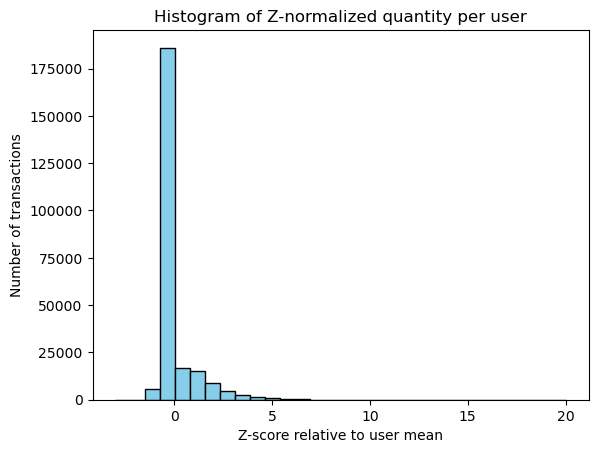

In [78]:
# Present histogram of qty_std_Z_byuser
# Add code here
plt.hist(churn['qty_std_Z_byuser'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Z-normalized quantity per user')
plt.xlabel('Z-score relative to user mean')
plt.ylabel('Number of transactions')
plt.show()

**What could be the purpose of this normalization?**
<br/>
Add comment here:  
The purpose is to make the data comparable across different users. The distribution shows all transanctions normalized per user where most values cluster around 0, because Z-scores center the data by user's mean, which is 0 in a Z normal distribution. 

7. Convert `item_id` into a category column in `churn_processed`.  Replace the `item_id` of all the items sold only once in the entire data with `"999999"`.  How many item ids are of category `"999999"`?  Display 10 rows of `churn_processed` where `item_id` is category `"999999"`.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[2 point]</span>

In [76]:
# Convert item_id into a category column in churn_processed
# Add code here
churn_processed['item_id'] = churn['item_id'].astype('category')

In [77]:
# Add code here

# Add Category
churn_processed['item_id'] = churn_processed['item_id'].cat.add_categories(["999999"])

#  Replace the item_id of all the items sold only once in the entire data with "999999"  
item_counts = churn_processed['item_id'].value_counts()
rare_items = item_counts[item_counts == 1].index #  Identify items sold only once
churn_processed.loc[churn_processed['item_id'].isin(rare_items), 'item_id'] = "999999" # replace rare items with "999999"

# How many item ids are of category "999999"
num_rare = (churn_processed['item_id'] == "999999").sum()
print(f'Number of item_ids replaced with "999999": {num_rare}')

# Display 10 rows of churn_processed where item_id is category 999999
print(churn_processed[churn_processed['item_id'] == "999999"].head(10))


Number of item_ids replaced with "999999": 876
      address_A  address_B  address_C  address_D  address_E  address_F  \
847         0.0        0.0        0.0        0.0        0.0        0.0   
1415        0.0        0.0        0.0        0.0        1.0        0.0   
1452        0.0        0.0        0.0        0.0        0.0        0.0   
1457        0.0        0.0        0.0        0.0        0.0        0.0   
1458        0.0        0.0        0.0        0.0        0.0        0.0   
2201        0.0        0.0        0.0        0.0        1.0        0.0   
2388        0.0        0.0        0.0        0.0        1.0        0.0   
2468        0.0        0.0        0.0        0.0        1.0        0.0   
3045        0.0        0.0        0.0        0.0        1.0        0.0   
3871        0.0        1.0        0.0        0.0        0.0        0.0   

      address_G  address_H  dow_0  dow_1  ...  dow_4  dow_5  dow_6  month_1  \
847         1.0        0.0    0.0    0.0  ...    0.0    0.0

# End of assignment